In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.0 ETL (Extract, Load, Transform)
We will import the dataset, allowing us to gain an insight into the statistical analysis before cleaning the data to give us an output that we can visualise

## 1.1 Load the data
This will enable us to convert our csv file into a pandas dataframe making it easier to view and clean before exporting.

In [180]:
# Load the dataset
df = pd.read_csv('../data/raw_data/bankchurners.csv')

## 1.2 Inspect the dataset
Explore the dataset to understand the structure of it, the dtypes within it and the values it contains

In [181]:
# View the first 5 rows to check successful import
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [182]:
# Check the data structure, how many rows and columns it has and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

By checking column names we can get an early insight into which ones can and can't help us tell our story. This will influence which columns we keep and drop.

In [183]:
# Check the full list of column names. 
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Checking dtypes can tell us quantity of each dtype. Objects may be converted to category.

In [184]:
# Check the dtypes of the data
df.dtypes.value_counts()

int64      10
float64     7
object      6
Name: count, dtype: int64

In [185]:
# Get a statistical analysis of the data
df.describe(include='all')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,...,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,...,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,...,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,...,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,...,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,...,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900


The table above has a statistical analysis contains all dtypes so it will be worth separating the numerical columns to prevent less NaNs appearing in our table.

In [186]:
numeric = ['Customer_Age', 'Dependent_count','Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']

In [187]:
# Statistical analysis of numeric columns
df[numeric].describe(include='all')

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000


After looking at the statistical analysis there looks to be outliers in most of the numerical columns. We will plot those on a boxplot to see the extent of these and decide whether to proceed with them in the dataset or remove them.

## 1.3 Deal with problem values
We will deal with values that will be problematic and could skew our results:
- Addressing missing values
- Dropping duplicates
- Inspecting outliers

In [188]:
# Look for missing values:
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [189]:
# Checking for duplicates:
df.duplicated().sum()

np.int64(0)

We have no duplicates or missing values in this dataset so have no reason to use
df.fillna()
df = df.drop_duplicates()

### 1.3.1 Plotting values to check for outliers
By plotting our values on boxplots and histograms we can check for outliers as well as checking distribution of our data. This could give us an early indication of whether our hypotheses are to be proved or disproved, but can't be confirmed without advanced visualisation.

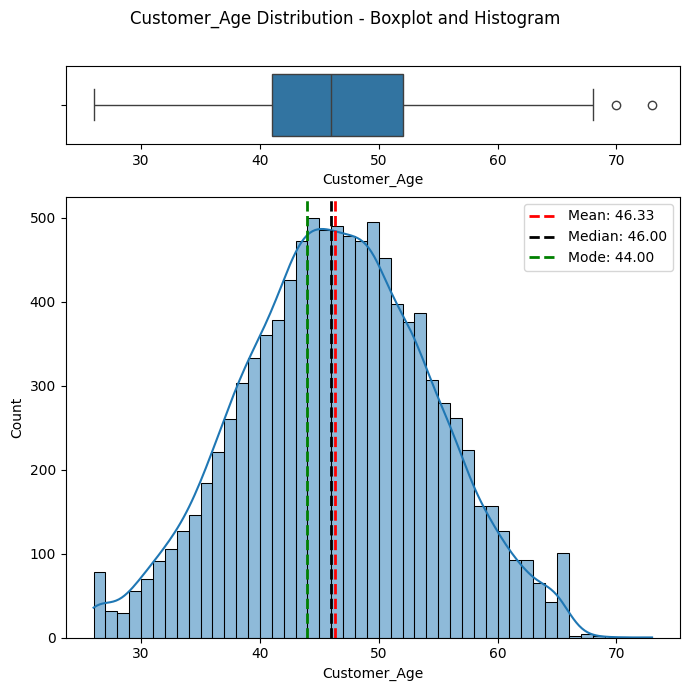

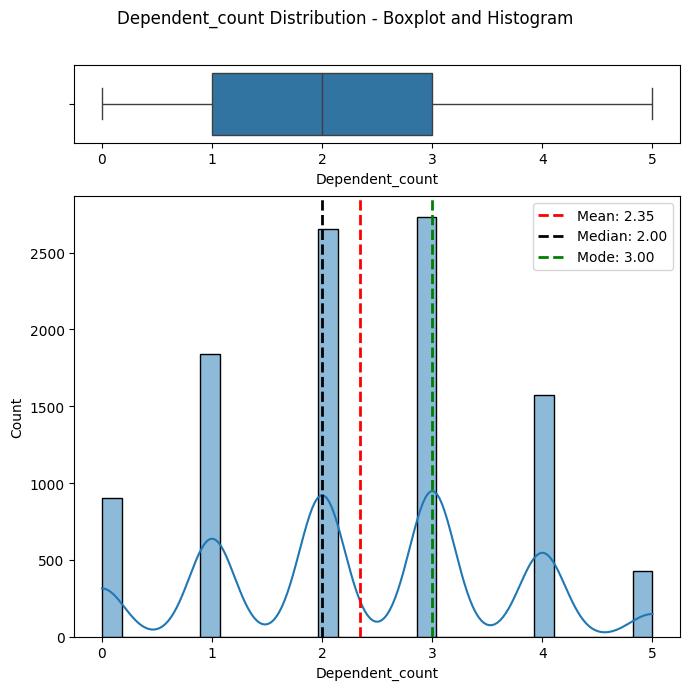

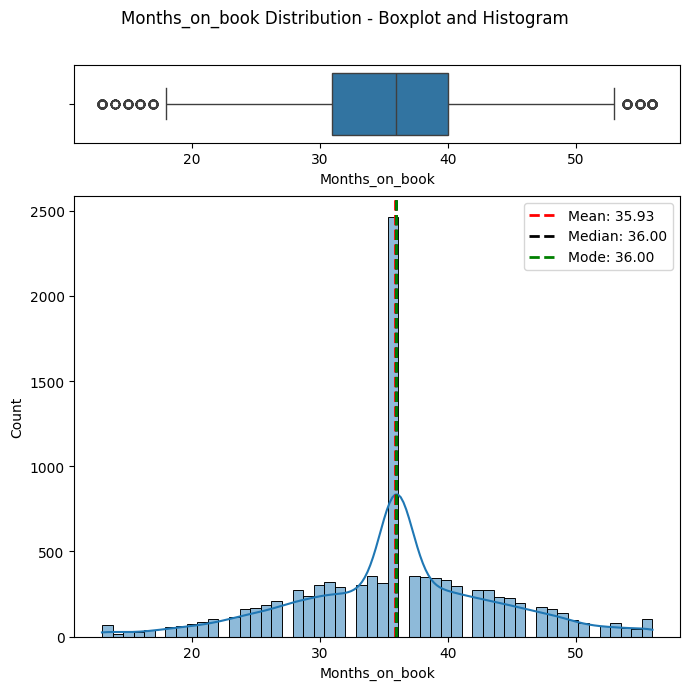

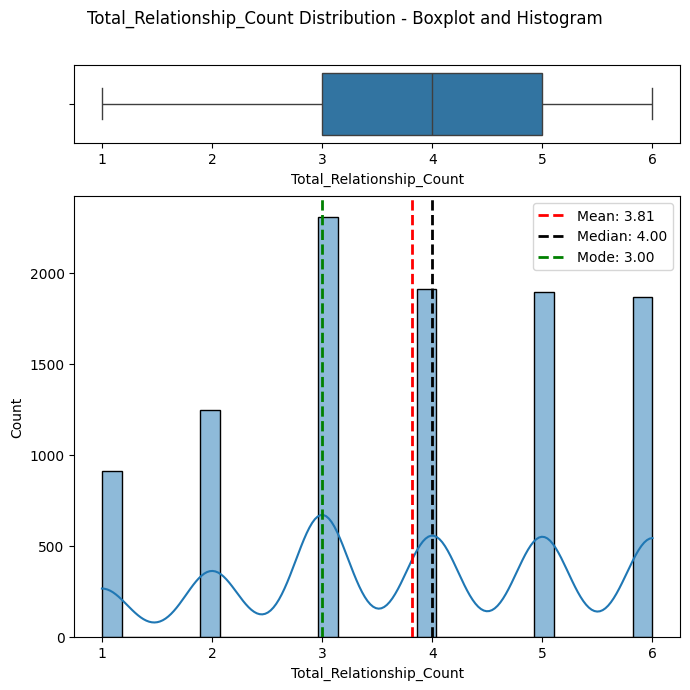

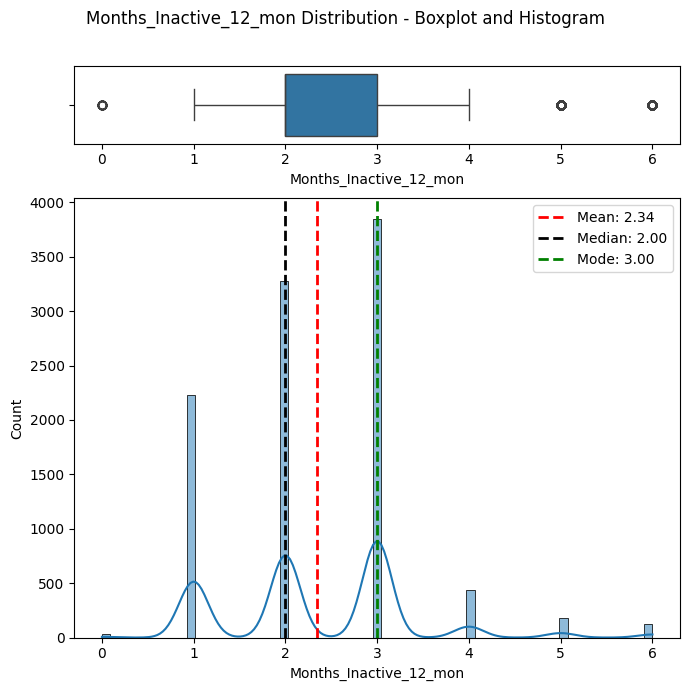

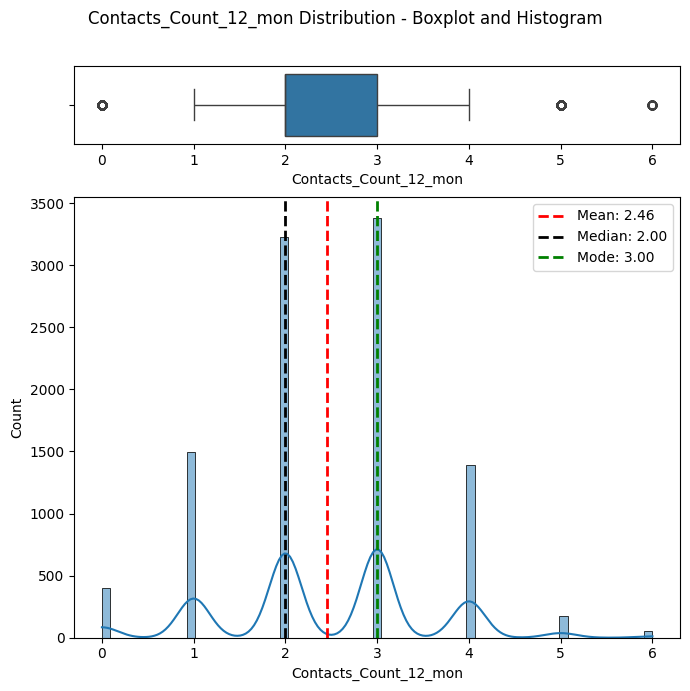

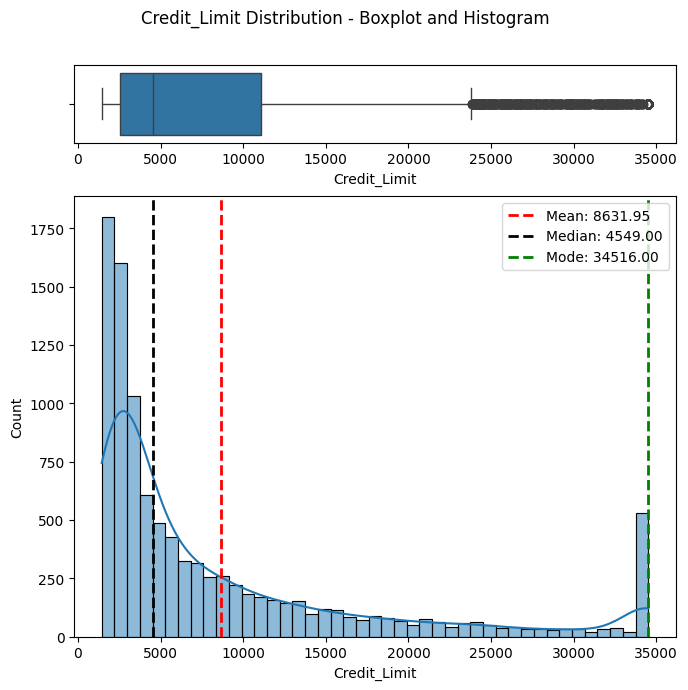

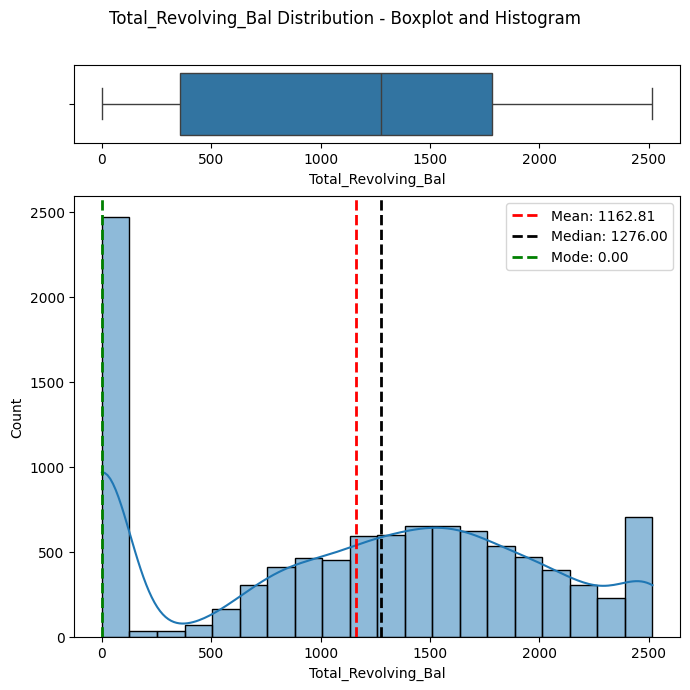

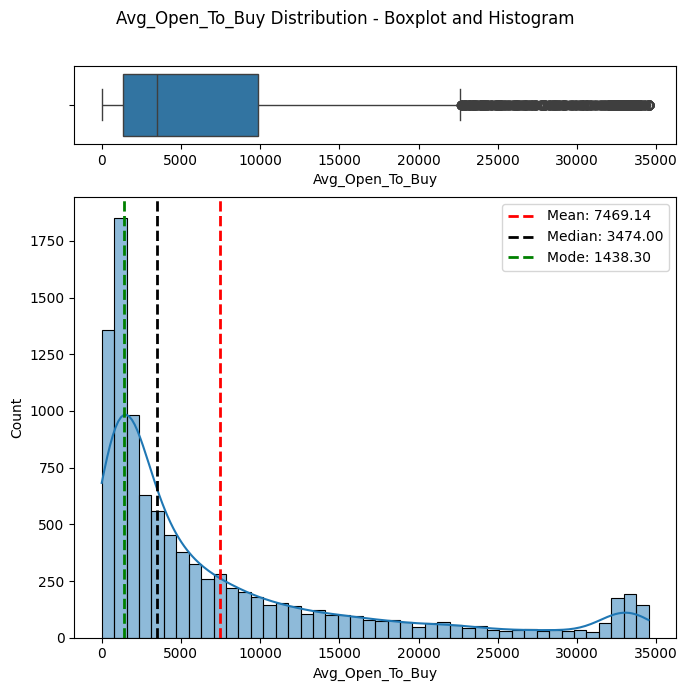

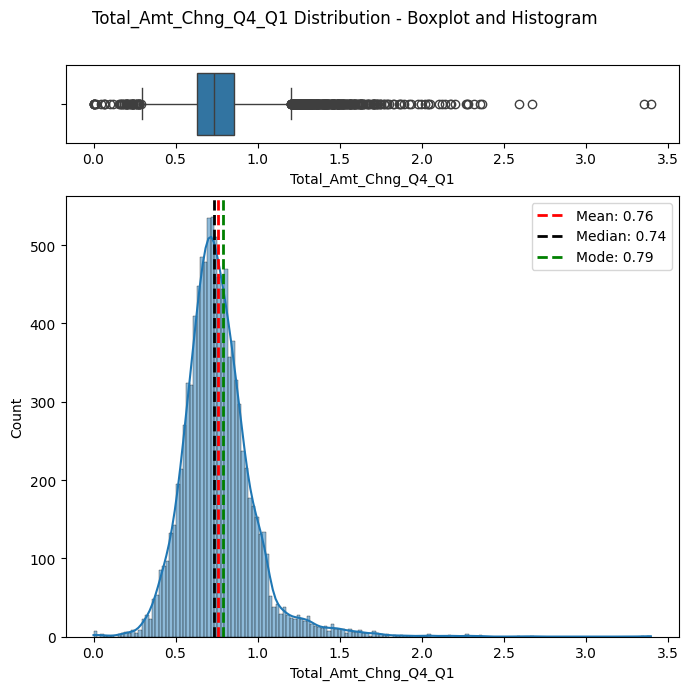

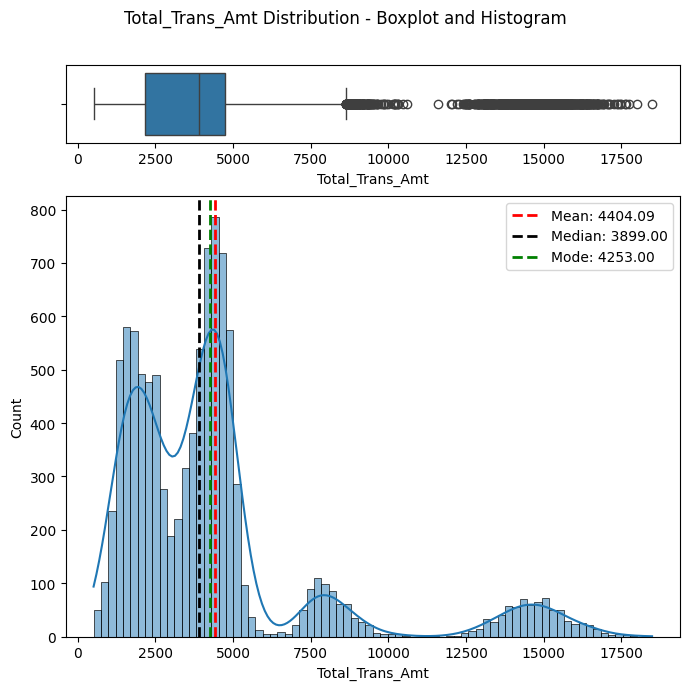

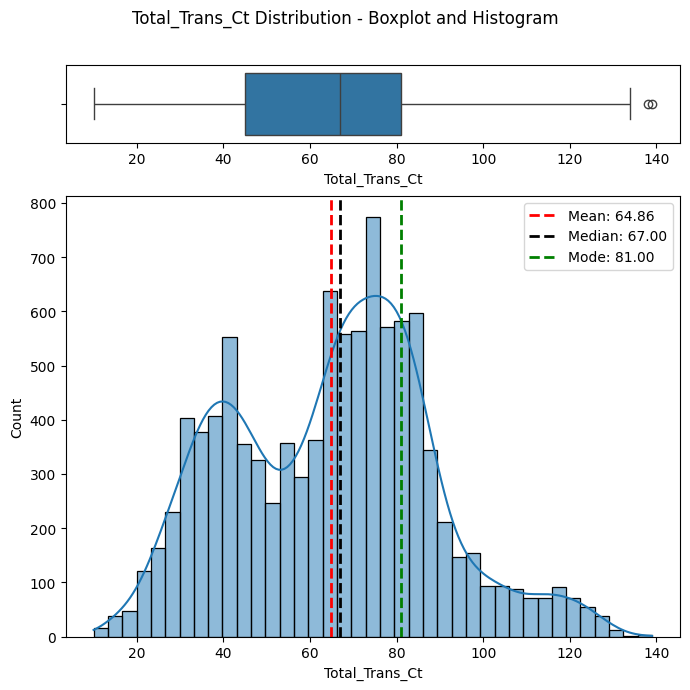

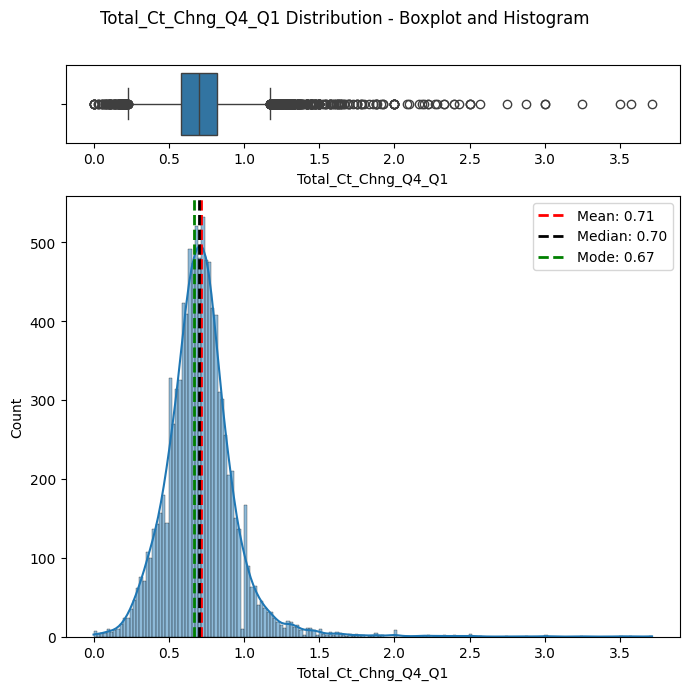

In [190]:
for col in numeric:
    fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(7,7), gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x=col, ax=axes[0])
    sns.histplot(data=df, x=col, kde=True, ax=axes[1])
    
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]

    plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {mean:.2f}")
    plt.axvline(median, color='k', linestyle='dashed', linewidth=2, label=f"Median: {median:.2f}")
    plt.axvline(mode, color='g', linestyle='dashed', linewidth=2, label=f"Mode: {mode:.2f}")

    plt.legend(loc="upper right", fontsize=10)
    
    plt.tight_layout()

    fig.suptitle(f"{col} Distribution - Boxplot and Histogram")

    plt.subplots_adjust(top=0.9)

    plt.show()

print("\n")

From this statistical analysis we have decided which outliers we are going to get rid of and which columns to drop as they aren't relevant to our project hypotheses.
Columns to drop: Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1, Avg_Open_To_Buy, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2

In [191]:
# Dealing with outliers in Months on book
Q1 = df['Months_on_book'].quantile(0.25)
Q3 = df['Months_on_book'].quantile(0.75)
IQR = Q3-Q1

bottom_outliers = Q1 - (1.5 * IQR)
top_outliers = Q3 + (1.5 * IQR)
print(f"top outliers are {top_outliers}")
print(f"bottom outliers are {bottom_outliers}")

top outliers are 53.5
bottom outliers are 17.5


In [192]:
# Dealing with outliers in Months Inactive
Q1 = df['Months_Inactive_12_mon'].quantile(0.25)
Q3 = df['Months_Inactive_12_mon'].quantile(0.75)
IQR = Q3-Q1

bottom_outliers = Q1 - (1.5 * IQR)
top_outliers = Q3 + (1.5 * IQR)
print(f"top outliers are {top_outliers}")
print(f"bottom outliers are {bottom_outliers}")

top outliers are 4.5
bottom outliers are 0.5


In [193]:
# Dealing with outliers in Contacts_Count
Q1 = df['Contacts_Count_12_mon'].quantile(0.25)
Q3 = df['Contacts_Count_12_mon'].quantile(0.75)
IQR = Q3-Q1

bottom_outliers = Q1 - (1.5 * IQR)
top_outliers = Q3 + (1.5 * IQR)
print(f"top outliers are {top_outliers}")
print(f"bottom outliers are {bottom_outliers}")

top outliers are 4.5
bottom outliers are 0.5


We will delete these from our dataframe to prevent a skew in our results

In [194]:
# Assign outliers to variables
months_on_book_outliers = df[(df['Months_on_book'] <= 17.5) | (df['Months_on_book'] >= 53.5)]
months_inactive_outliers = df[(df['Months_Inactive_12_mon'] <= 0.5) | (df['Months_Inactive_12_mon'] >= 4.5)]
contacts_count_outliers = df[(df['Contacts_Count_12_mon'] <= 0.5) | (df['Contacts_Count_12_mon'] >= 4.5)]

In [195]:
# Check shape of each set of outliers
print(months_on_book_outliers['Months_on_book'].shape)
print(months_inactive_outliers['Months_Inactive_12_mon'].shape)
print(contacts_count_outliers['Contacts_Count_12_mon'].shape)

(386,)
(331,)
(629,)


We will now delete all outliers from these three columns to maintain data integrity and allow for analysis.

In [196]:
# check shape before deletion
df.shape

(10127, 23)

In [197]:
# Combine all 3 sets of outliers to drop them in one command
values_to_drop = months_on_book_outliers.index.union(months_inactive_outliers.index).union(contacts_count_outliers.index)
df = df.drop(values_to_drop)

In [198]:
# Check shape once outliers have been dropped
df.shape

(8849, 23)

## 1.4 Column management
Here we will drop any columns that are not relevant to our story, as well as tidy up any that we are keeping. One change will be to make all characters lowercase to remove the inconsistency of capitalised letters. We may also change column names to improve readability.

In [199]:
# Make all characters lowercase
df.columns = df.columns.str.casefold()

In [200]:
# Check change has been made correctly
df.head(1)

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991


In [ ]:
# Rename columns for readability
df.rename(columns={'attrition_flag' : 'customer_status', 'customer_age' : 'age', 'dependent_count' : 'dependencies', 'total_relationship_count' : 'no_of_products'}, inplace=True)

In [202]:
# Check the new names
df.head(1)

,clientnum,customer_status,age,gender,dependencies,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991


In [204]:
# Drop columns that are no longer needed:
df.drop(['naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1', 'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2', 'total_ct_chng_q4_q1', 'total_amt_chng_q4_q1', 'avg_open_to_buy'], axis=1, inplace=True)

In [ ]:
# Check that remaining columns are the ones required.
df.columns

Index(['clientnum', 'customer_status', 'age', 'gender', 'dependencies',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'no_of_products', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'total_trans_amt', 'total_trans_ct', 'avg_utilization_ratio'],
      dtype='object')

By changing the column names removing unnecessary capitalistation we can work effectively calling columns. Dropping columns has also meant that we are now left with the information that is relevant to our project.

## 1.5 Changing dtypes

We can check out data types with a view to change any of them for functionality reasons or looking to bring down memory usage. This is imperative on datasets with LARGE volume.

In [ ]:
# Check initial dtype value counts
print(df.dtypes.value_counts())

int64      10
object      6
float64     2
Name: count, dtype: int64


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8849 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   clientnum               8849 non-null   int64  
 1   customer_status         8849 non-null   object 
 2   age                     8849 non-null   int64  
 3   gender                  8849 non-null   object 
 4   dependencies            8849 non-null   int64  
 5   education_level         8849 non-null   object 
 6   marital_status          8849 non-null   object 
 7   income_category         8849 non-null   object 
 8   card_category           8849 non-null   object 
 9   months_on_book          8849 non-null   int64  
 10  no_of_products          8849 non-null   int64  
 11  months_inactive_12_mon  8849 non-null   int64  
 12  contacts_count_12_mon   8849 non-null   int64  
 13  credit_limit            8849 non-null   float64
 14  total_revolving_bal     8849 non-null   int6

In [212]:
# Assign categoricals to a variable before iterating over them and coverting them from objects to category.
df_categoricals = ['customer_status', 'gender', 'education_level', 'marital_status', 'income_category', 'card_category']
	
for col in df_categoricals:
    df[col] = df[col].astype('category') 

In [ ]:
# Check that all objects have been converted to categoricals.
print(df.dtypes.value_counts())

int64       10
float64      2
category     1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64
